In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import helpers

pd.set_option("display.max_columns", 500)

random_seed = 2024
np.random.seed(random_seed)

target_feature = helpers.target_feature

## 3. Calculating correlations between features

We will observe reletionships between different features

In [2]:
data = pd.read_csv('../data/barely_processed_train.csv', index_col=0)
data.drop(target_feature, axis=1)

,R_Depth,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,Lat_Dec,Lon_Dec
442244,58.0,33.561,25.450,252.6,0.20,4.23,69.4,13.4,1.23,13.9,0.07,NaN,0.71,0.75,58.0,33.818333,-121.855000
524188,40.0,33.580,25.538,244.7,0.13,4.05,65.9,14.0,1.32,13.6,0.36,1.02,0.38,0.23,40.0,32.991780,-120.359020
274404,30.0,34.860,23.570,432.3,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,20.000000,-139.000000
488743,50.0,33.560,25.400,257.8,0.15,4.29,70.8,11.4,1.22,14.7,0.08,NaN,0.11,0.20,50.0,32.986666,-120.348333
365964,0.0,33.189,24.260,364.6,0.00,5.85,104.6,1.4,0.38,0.2,0.00,NaN,0.18,0.03,0.0,33.143333,-123.238333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292581,10.0,33.440,25.390,257.4,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,35.300000,-121.958333
323,21.0,33.130,25.030,292.0,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,33.250000,-122.083333
461935,229.0,34.191,26.330,172.6,0.53,1.68,26.4,32.7,2.31,27.7,0.01,NaN,NaN,NaN,230.0,32.915000,-117.396666
468588,39.0,33.072,25.060,289.5,0.12,5.12,83.8,7.3,1.03,8.5,0.34,NaN,0.43,0.32,39.0,34.891666,-121.205000


In [3]:
data.shape

(370736, 18)

# Correlations

We have a dataset of 17 variables and we woudl like to know how they interact with each other eg if there is some sort of dependency. Later we would like to compute some new features, so 

In [4]:
col = data.columns

In [5]:
print(col)

Index(['R_Depth', 'R_TEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT',
       'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4',
       'R_CHLA', 'R_PHAEO', 'R_PRES', 'Lat_Dec', 'Lon_Dec'],
      dtype='object')


# Heatmap plotting

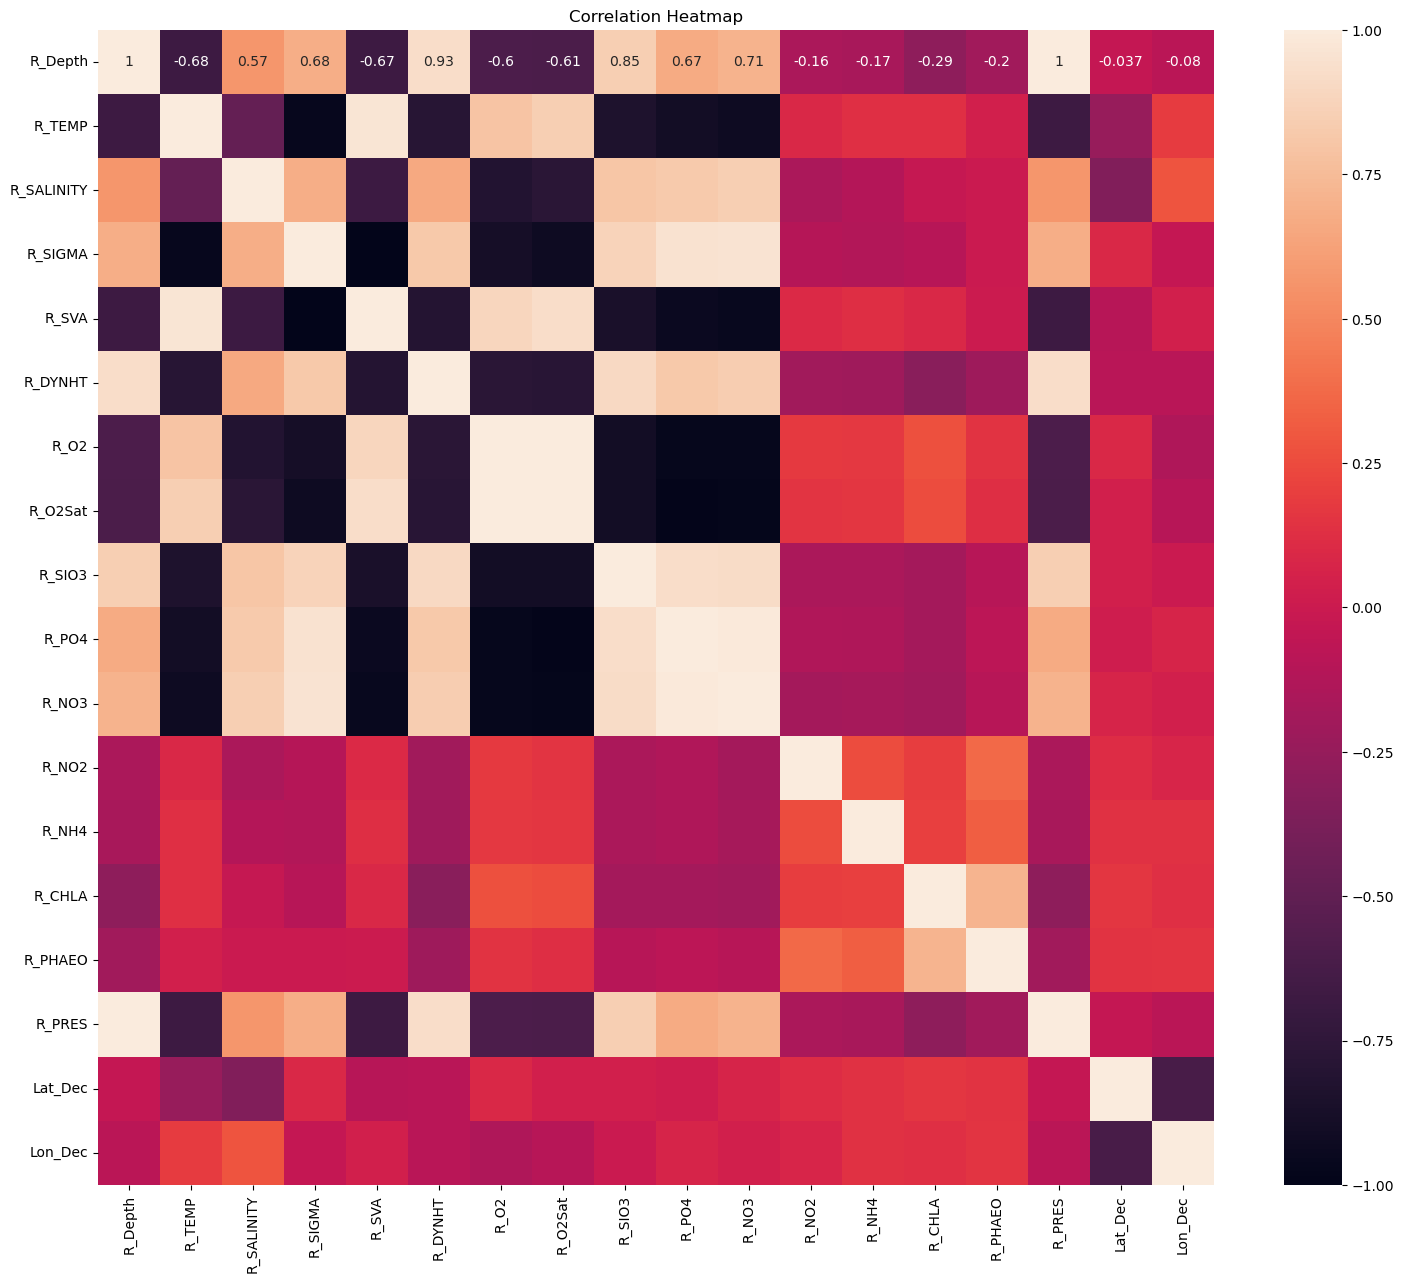

In [6]:
corr = data.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0)
plt.title('Correlation Heatmap')
plt.show()

We can see that some features are very strongly correlated.

In [7]:
correlations = data.corr()[target_feature].sort_values().drop(target_feature)

print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 R_NH4      0.127059
Lon_Dec    0.180799
R_O2       0.789698
R_O2Sat    0.847077
R_SVA      0.962371
Name: R_TEMP, dtype: float64

Most Negative Correlations:
 R_SIGMA   -0.961803
R_NO3     -0.923425
R_PO4     -0.900662
R_SIO3    -0.839669
R_DYNHT   -0.791543
Name: R_TEMP, dtype: float64


In [8]:
correlations

R_SIGMA      -0.961803
R_NO3        -0.923425
R_PO4        -0.900662
R_SIO3       -0.839669
R_DYNHT      -0.791543
R_Depth      -0.676357
R_PRES       -0.674994
R_SALINITY   -0.477332
Lat_Dec      -0.248777
R_PHAEO       0.032832
R_NO2         0.091125
R_CHLA        0.125801
R_NH4         0.127059
Lon_Dec       0.180799
R_O2          0.789698
R_O2Sat       0.847077
R_SVA         0.962371
Name: R_TEMP, dtype: float64